# Modified National Institute of Standards and Technology dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [4]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

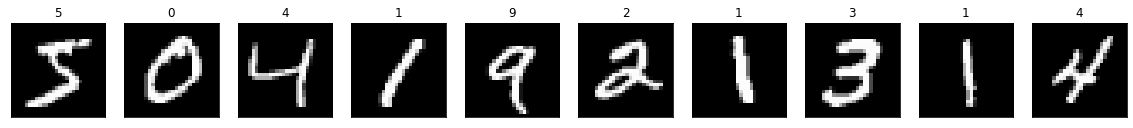

In [6]:
fig, axes=plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
#converting the values into decimals
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [13]:
#reducing the values between 0 to 1 (minmax scalar)
x_train /= 255
x_test /= 255

In [17]:
# CONVERT THE OUTPUT INTO DUMMIES 
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [20]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
model=Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train,batch_size=32, epochs=10,verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1318 - accuracy: 0.9590 - val_loss: 0.0701 - val_accuracy: 0.9767
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0591 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0527 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0496 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0660 -

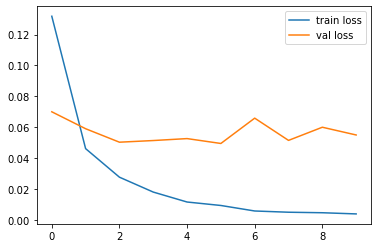

In [32]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()

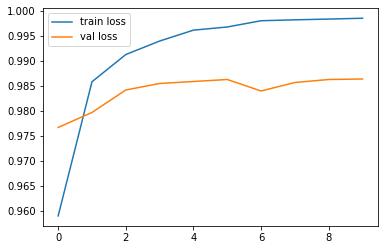

In [35]:
plt.plot(model.history.history['accuracy'], label='train loss')
plt.plot(model.history.history['val_accuracy'], label='val loss')
plt.legend()

In [36]:
model.save('mnist_model_cnn.h5')

In [38]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
plt.imshow(x_test[656],cmap='gray')

In [39]:
x= np.reshape(x_test[556],(1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 30ms/step


4